In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.image as mpimg
import matplotlib.patches as patches

from matplotlib.patches import Rectangle

#from PIL import Image

# from scipy import ndimage
import copy

In [2]:
bin_size = 500

img_mp = np.ndarray([bin_size], dtype=np.ndarray)
img_ob = np.ndarray([bin_size], dtype=np.ndarray)
img_sum = np.zeros([bin_size])
img_int = np.zeros([bin_size])

In [3]:
for i in range(bin_size):
    img_mp[i] = np.random.randint(0,10,size=20**2).reshape(20,20)
    img_ob[i] = copy.deepcopy(img_mp[i])
    img_ob[i][5:-5, 5:-5] = 0
    img_sum[i] = np.sum(img_ob[i])
    img_int[i] = np.sum(img_mp[i])
    
bucket_avg = np.mean(img_sum)
int_avg = np.mean(img_int)

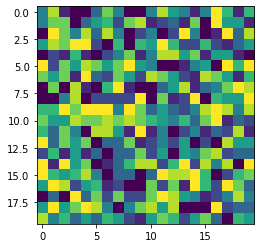

In [4]:
plt.imshow(img_mp[0])

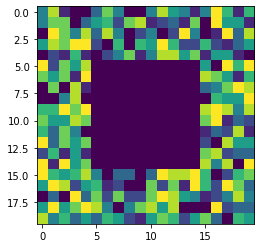

In [5]:
plt.imshow(img_ob[0])

In [6]:
ghost = np.zeros([20,20])

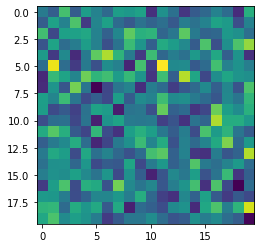

In [88]:
# Default second order GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin])*img_mp[bin][i][j]
            #print(sum)
            #print(type(img_sum[bin]))
            #print(type(img_mp[bin]))


        ghost[i,j]=sum/bin_size  
        
plt.imshow(ghost)

In [89]:
print(bucket_avg)

1353.278


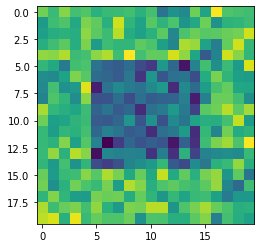

In [91]:
# Differential GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin] - bucket_avg*img_int[bin]/int_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)

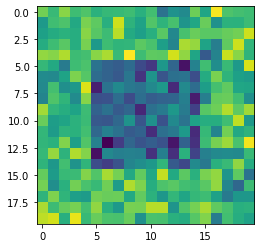

In [92]:
# Normalized GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin]/img_int[bin] - bucket_avg/int_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)

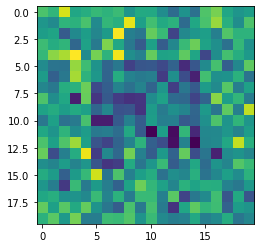

In [93]:
# Logarithmic GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += np.log(img_sum[bin]/bucket_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)

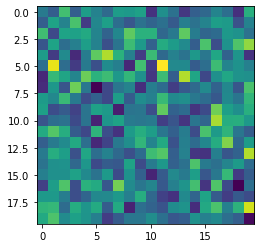

In [94]:
# Exponential GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += 10**(img_sum[bin]/img_int[bin])*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)

In [7]:
img_mean_list = []
for bin in range(bin_size):
    img_mp_arr =[]
    for i in range(img_mp[bin].shape[0]):
        for j in range(img_mp[bin].shape[1]):
            img_mp_arr.append(img_mp[bin][i][j])
    img_mean = np.mean(img_mp_arr)
    print(img_mean)
    img_mean_list.append(img_mean)
print(np.mean(img_mean_list))

4.49
4.4075
4.5225
4.35
4.37
4.5325
4.6525
4.6575
4.565
4.66
4.3825
4.6675
4.715
4.5
4.7
4.3
4.475
4.1975
4.565
4.45
4.365
4.375
4.325
4.485
4.72
4.39
4.5125
4.3075
4.52
4.495
4.68
4.5275
4.36
4.5275
4.4775
4.4875
4.3625
4.54
4.655
4.6975
4.4525
4.3775
4.7925
4.4675
4.385
4.2475
4.285
4.305
4.4125
4.505
4.3075
4.375
4.3925
4.4075
4.595
4.33
4.5875
4.7425
4.44
4.41
4.5425
4.33
4.4525
4.615
4.34
4.4275
4.585
4.6125
4.3775
4.6375
4.39
4.59
4.7
4.565
4.5925
4.5775
4.3575
4.515
4.485
4.3825
4.755
4.3775
4.525
4.46
4.7475
4.4
4.285
4.4825
4.3975
4.5625
4.5525
4.5725
4.51
4.395
4.485
4.6325
4.56
4.5075
4.58
4.44
4.355
4.61
4.545
4.6725
4.4175
4.6675
4.7075
4.435
4.285
4.27
4.7
4.3175
4.4825
4.4875
4.7875
4.6875
4.545
4.6275
4.5925
4.3475
4.4175
4.57
4.3875
4.505
4.7075
4.4625
4.385
4.71
4.4
4.2625
4.465
4.4225
4.58
4.395
4.4375
4.4625
4.465
4.505
4.495
4.5575
4.5475
4.5475
4.2875
4.4325
4.3075
4.2925
4.3925
4.6525
4.4775
4.3875
4.32
4.305
4.6075
4.315
4.1475
4.66
4.63
4.6625
4.525
4.3725
4.29

In [8]:
img_ob_mean_list = []
for bin in range(bin_size):
    img_ob_arr =[]
    for i in range(img_ob[bin].shape[0]):
        for j in range(img_ob[bin].shape[1]):
            img_ob_arr.append(img_ob[bin][i][j])
    img_ob_mean = np.mean(img_ob_arr)
    print(img_ob_mean)
    img_ob_mean_list.append(img_ob_mean)
print(np.mean(img_ob_mean_list))

3.4525
3.355
3.34
3.2525
3.355
3.4175
3.48
3.5525
3.415
3.4525
3.1875
3.425
3.4375
3.2975
3.62
3.2775
3.4625
3.0875
3.3425
3.3075
3.315
3.34
3.22
3.32
3.505
3.24
3.47
3.23
3.315
3.335
3.54
3.3925
3.335
3.37
3.2975
3.4675
3.165
3.5425
3.475
3.5275
3.36
3.335
3.5725
3.3725
3.275
3.1
3.24
3.25
3.3325
3.505
3.23
3.2725
3.2775
3.3
3.485
3.255
3.385
3.58
3.3875
3.295
3.3975
3.3575
3.3875
3.62
3.255
3.24
3.425
3.455
3.3025
3.51
3.25
3.555
3.5675
3.4075
3.4625
3.4125
3.3225
3.3625
3.3575
3.2725
3.58
3.2375
3.4075
3.42
3.5075
3.2325
3.2075
3.3275
3.3025
3.435
3.3225
3.3725
3.335
3.155
3.34
3.5525
3.425
3.48
3.385
3.2775
3.2825
3.3825
3.44
3.6225
3.3875
3.5425
3.5025
3.2825
3.2725
3.1
3.5075
3.375
3.2225
3.4775
3.65
3.3925
3.425
3.47
3.47
3.2325
3.2575
3.3425
3.29
3.4675
3.575
3.3775
3.255
3.6125
3.355
3.28
3.3925
3.3025
3.5275
3.335
3.4525
3.405
3.365
3.44
3.4
3.4475
3.4
3.3425
3.2
3.29
3.23
3.1725
3.265
3.5475
3.3875
3.135
3.1725
3.1575
3.5225
3.18
3.0325
3.545
3.3925
3.45
3.3125
3.3125
3.235


In [9]:
g_2 = np.zeros([20,20])
for i in range(g_2.shape[0]):
    for j in range(g_2.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_ob[bin][i][j]-img_ob_mean_list[bin])*(img_mp[bin][i][j]-img_mean_list[bin])
            #print(sum)
        g_2[i,j]=sum/bin_size

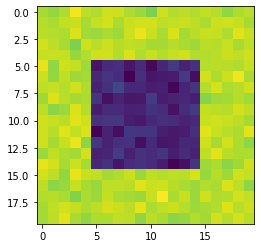

In [10]:
plt.imshow(g_2)

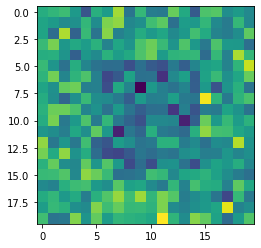

In [19]:
for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin] - bucket_avg)*(img_mp[bin][i][j]-img_mean_list[bin])
            #print(sum)
            #print(type(img_sum[bin]))
            #print(type(img_mp[bin]))


        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)

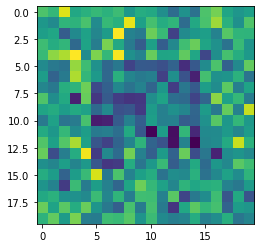

In [90]:
for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin] - bucket_avg)*img_mp[bin][i][j]
            #print(sum)
            #print(type(img_sum[bin]))
            #print(type(img_mp[bin]))


        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)